# Loading Data & Visualizations
goals
* Get Data
* Inspect Data
* The .pipe method

### Loading Data

In [20]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [21]:
raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')

[*********************100%%**********************]  2 of 2 completed


In [22]:
raw

Price       Adj Close                  Close                   High  \
Ticker           AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2010-01-04   6.461976   86.860062   7.643214  113.330002   7.660714   
2010-01-05   6.473151   87.090004   7.656429  113.629997   7.699643   
2010-01-06   6.370183   87.151291   7.534643  113.709999   7.686786   
2010-01-07   6.358408   87.519203   7.520714  114.190002   7.571429   
2010-01-08   6.400682   87.810432   7.570714  114.570000   7.571429   
...               ...         ...        ...         ...        ...   
2019-12-23  68.988739  300.696716  71.000000  321.220001  71.062500   
2019-12-24  69.054329  300.706116  71.067497  321.230011  71.222504   
2019-12-26  70.424408  302.306824  72.477501  322.940002  72.495003   
2019-12-27  70.397667  302.231934  72.449997  322.859985  73.492500   
2019-12-30  70.815506  300.565674  72.879997  321.079987  73.172501   

Price                         Low                   Open              \
Ticker             SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2010-01-04  113.389999   7.585000  111.510002   7.622500  112.370003   
2010-01-05  113.680000   7.616071  112.849998   7.664286  113.260002   
2010-01-06  113.989998   7.526786  113.430000   7.656429  113.519997   
2010-01-07  114.330002   7.466071  113.180000   7.562500  113.500000   
2010-01-08  114.620003   7.466429  113.660004   7.510714  113.889999   
...                ...        ...         ...        ...         ...   
2019-12-23  321.649994  70.092499  321.059998  70.132500  321.589996   
2019-12-24  321.519989  70.730003  320.899994  71.172501  321.470001   
2019-12-26  322.950012  71.175003  321.640015  71.205002  321.649994   
2019-12-27  323.799988  72.029999  322.279999  72.779999  323.739990   
2019-12-30  323.100006  71.305000  320.549988  72.364998  322.950012   

Price          Volume             
Ticker           AAPL        SPY  
Date                              
2010-01-04  493729600  118944600  
2010-01-05  601904800  111579900  
2010-01-06  552160000  116074400  
2010-01-07  477131200  131091100  
2010-01-08  447610800  126402800  
...               ...        ...  
2019-12-23   98572000   52990000  
2019-12-24   48478800   20270000  
2019-12-26   93121200   30911200  
2019-12-27  146266000   42528800  
2019-12-30  144114400   49729100  

[2515 rows x 12 columns]

In [23]:
raw.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close',  'SPY'),
            (    'Close', 'AAPL'),
            (    'Close',  'SPY'),
            (     'High', 'AAPL'),
            (     'High',  'SPY'),
            (      'Low', 'AAPL'),
            (      'Low',  'SPY'),
            (     'Open', 'AAPL'),
            (     'Open',  'SPY'),
            (   'Volume', 'AAPL'),
            (   'Volume',  'SPY')],
           names=['Price', 'Ticker'])

In [6]:
# Going to use the .pipe method a lot
raw.pipe?

In [24]:
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.461976,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.473151,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.370183,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.358408,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.400682,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,68.988739,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.424408,72.477501,72.495003,71.175003,71.205002,93121200


In [8]:
import yfinance as yf

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns]
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start='2010-01-01', end='2019-12-31')
    
    return (raw
           .iloc[:, ::2]
           .pipe(fix_cols)
           )

tweak_data()

[*********************100%%**********************]  2 of 2 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.461976,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.473151,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.370183,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.358408,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.400682,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,68.988739,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.424408,72.477501,72.495003,71.175003,71.205002,93121200


## Line Plot
Goals
* Line plots
* Matplotlib plots

In [25]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
)

,Adj Close,Close,High,Low,Open
Date,,,,,
2010-01-04,6.461976,7.643214,7.660714,7.585000,7.622500
2010-01-05,6.473151,7.656429,7.699643,7.616071,7.664286
2010-01-06,6.370183,7.534643,7.686786,7.526786,7.656429
2010-01-07,6.358408,7.520714,7.571429,7.466071,7.562500
2010-01-08,6.400682,7.570714,7.571429,7.466429,7.510714
...,...,...,...,...,...
2019-12-23,68.988739,71.000000,71.062500,70.092499,70.132500
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501
2019-12-26,70.424408,72.477501,72.495003,71.175003,71.205002


<Axes: xlabel='Date'>

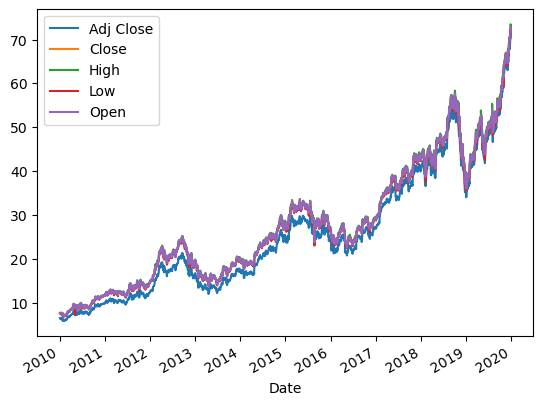

In [26]:
(raw
 .iloc[:, :-2:2]
 .pipe(fix_cols)
 .plot()
)

<Axes: xlabel='Date'>

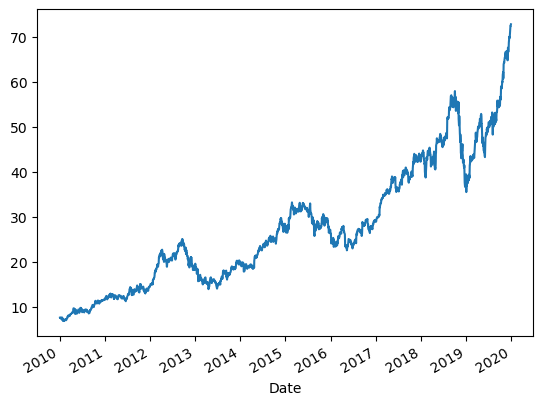

In [27]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

<Axes: xlabel='Date'>

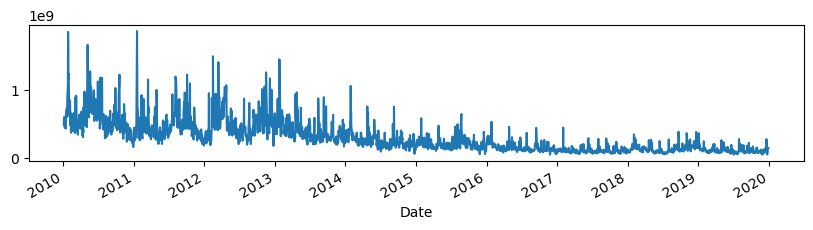

In [28]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Volume
 .plot(figsize=(10, 2))
)

# Resampling

<Axes: xlabel='Date'>

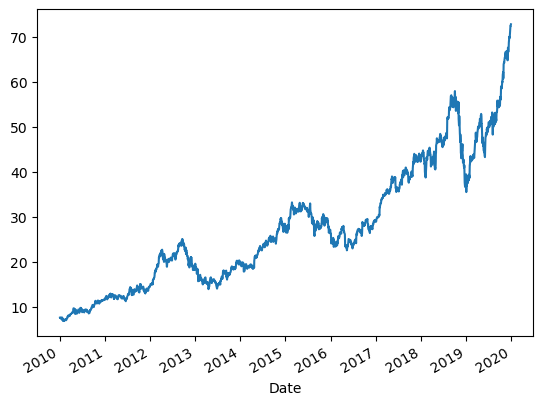

In [29]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
 .plot()
)

In [30]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .Close
)

Date
2010-01-04     7.643214
2010-01-05     7.656429
2010-01-06     7.534643
2010-01-07     7.520714
2010-01-08     7.570714
                ...    
2019-12-23    71.000000
2019-12-24    71.067497
2019-12-26    72.477501
2019-12-27    72.449997
2019-12-30    72.879997
Name: Close, Length: 2515, dtype: float64

In [31]:
# use resample to change granularity

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias, how we want to aggregatet this!
 .Close
)

In [32]:
# Every index entry (date), is the last day of the month with the offset alias of "M"
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
 .mean()
)

Date
2010-01-31     7.418402
2010-02-28     7.099850
2010-03-31     7.978960
2010-04-30     8.969592
2010-05-31     8.980768
                ...    
2019-08-31    51.239432
2019-09-30    54.498750
2019-10-31    58.821630
2019-11-30    65.630126
2019-12-31    68.917374
Freq: M, Name: Close, Length: 120, dtype: float64

In [17]:
raw.resample??

<Axes: xlabel='Date'>

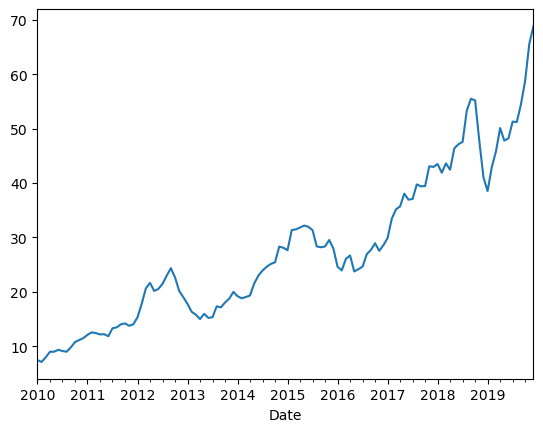

In [33]:
(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('M') # offset alias
 .Close
 .mean()
 .plot()
)

# Candlestick Plot

,Open,High,Low,Close
Date,,,,
2018-01-01,NaN,NaN,NaN,NaN
2018-01-02,42.540001,43.075001,42.314999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499
2018-01-04,43.134998,43.367500,43.020000,43.257500
2018-01-05,43.360001,43.842499,43.262501,43.750000
...,...,...,...,...
2018-06-26,45.747501,46.632500,45.634998,46.107498
2018-06-27,46.307499,46.820000,46.007500,46.040001
2018-06-28,46.025002,46.552502,45.950001,46.375000


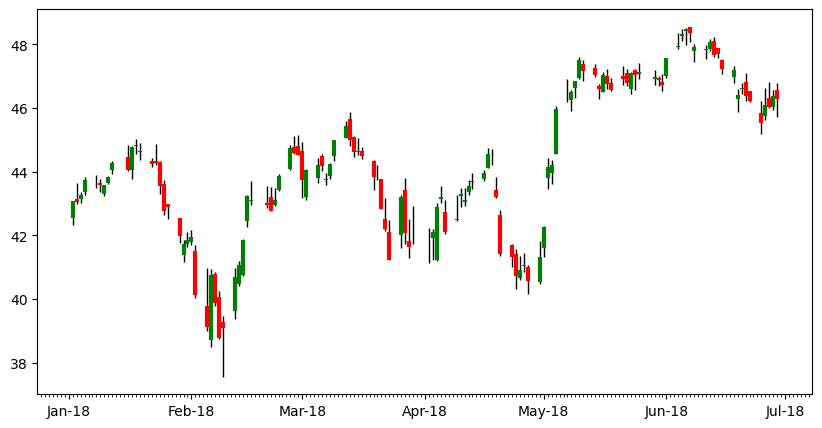

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
def plot_candle(df, ax):
    # wick 
    ax.vlines(x=df.index, ymin=df.Low, ymax=df.High, colors='k', linewidth=1)
    # red - decrease
    red = df.query('Open > Close')
    ax.vlines(x=red.index, ymin=red.Close, ymax=red.Open, colors='r', linewidth=3)
    # green - increase
    green = df.query('Open <= Close')
    ax.vlines(x=green.index, ymin=green.Close, ymax=green.Open, colors='g', linewidth=3)
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['jan 2018': 'jun 2018']
 .pipe(plot_candle, ax)
)    

# Challenge
Plot the Candles for the time period of Sep 2019 to Dec 2019.

,Open,High,Low,Close
Date,,,,
2018-09-01,NaN,NaN,NaN,NaN
2018-09-02,NaN,NaN,NaN,NaN
2018-09-03,NaN,NaN,NaN,NaN
2018-09-04,57.102501,57.294998,56.657501,57.090000
2018-09-05,57.247501,57.417500,56.275002,56.717499
...,...,...,...,...
2018-12-27,38.959999,39.192501,37.517502,39.037498
2018-12-28,39.375000,39.630001,38.637501,39.057499
2018-12-29,NaN,NaN,NaN,NaN


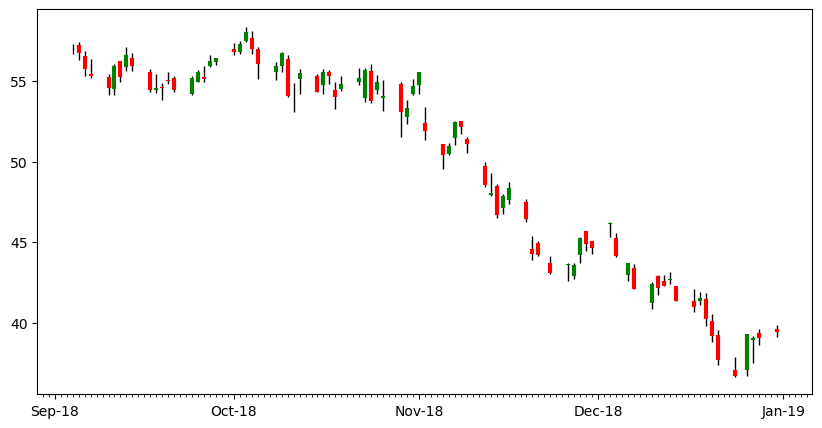

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
 .resample('d')
 .agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last'})
 .loc['sep 2018': 'dec 2018']
 .pipe(plot_candle, ax)
)    

# Calculations
Goal

* Explore Pandas methods like <code>.pct_change</code>
* Plotting with Pandas
* Refactoring to functions

## Returns

In [37]:
aapl = (raw
        .iloc[:, ::2]
       .pipe(fix_cols))
aapl

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,6.461976,7.643214,7.660714,7.585000,7.622500,493729600
2010-01-05,6.473151,7.656429,7.699643,7.616071,7.664286,601904800
2010-01-06,6.370183,7.534643,7.686786,7.526786,7.656429,552160000
2010-01-07,6.358408,7.520714,7.571429,7.466071,7.562500,477131200
2010-01-08,6.400682,7.570714,7.571429,7.466429,7.510714,447610800
...,...,...,...,...,...,...
2019-12-23,68.988739,71.000000,71.062500,70.092499,70.132500,98572000
2019-12-24,69.054329,71.067497,71.222504,70.730003,71.172501,48478800
2019-12-26,70.424408,72.477501,72.495003,71.175003,71.205002,93121200


In [38]:
# Returns
aapl.pct_change()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.001729,0.005082,0.004096,0.005482,0.219098
2010-01-06,-0.015907,-0.015906,-0.001670,-0.011723,-0.001025,-0.082646
2010-01-07,-0.001848,-0.001849,-0.015007,-0.008066,-0.012268,-0.135882
2010-01-08,0.006648,0.006648,0.000000,0.000048,-0.006848,-0.061871
...,...,...,...,...,...,...
2019-12-23,0.016318,0.016318,0.005661,0.006498,-0.006023,-0.642827
2019-12-24,0.000951,0.000951,0.002252,0.009095,0.014829,-0.508189
2019-12-26,0.019841,0.019840,0.017867,0.006292,0.000457,0.920864


In [39]:
aapl.pct_change?

## Plotting Returns

<Axes: xlabel='Date'>

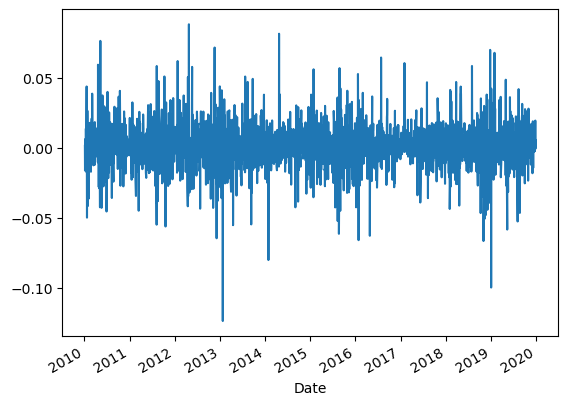

In [47]:
# Plot Returns
(aapl
 .pct_change()
 .Close
 .plot()
)

<Axes: >

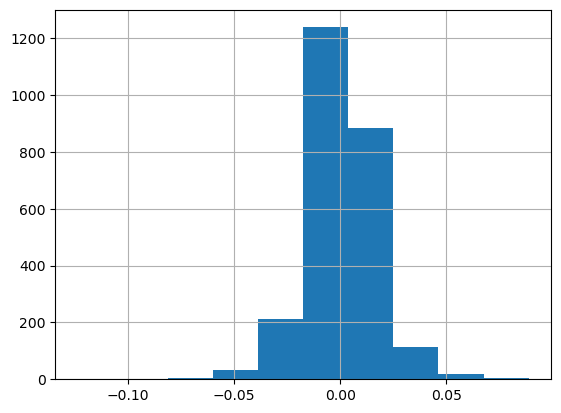

In [41]:
# Histogram of Returns
(aapl
 .pct_change()
 .Close
 .hist()
)

<Axes: >

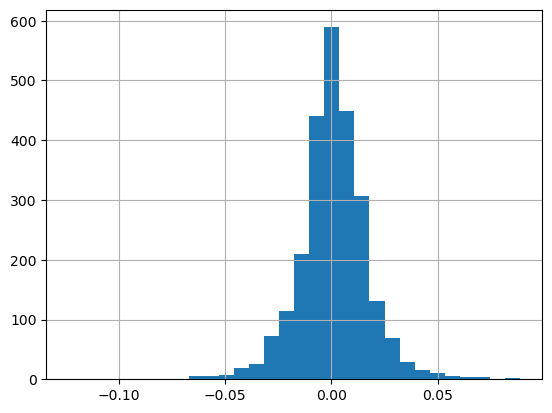

In [42]:
# Change bins
(aapl
 .pct_change()
 .Close
 .hist(bins=30)
)

<Axes: xlabel='Date'>

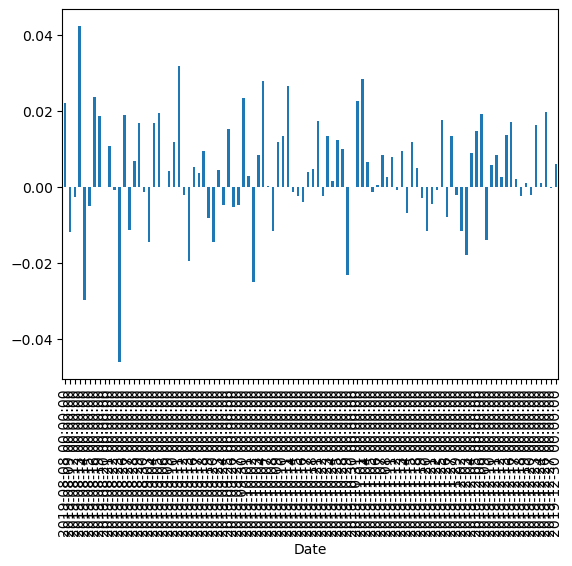

In [44]:
# Understanding plotting in Pandas is a huge lever
# Bar Plot returns
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar()
)

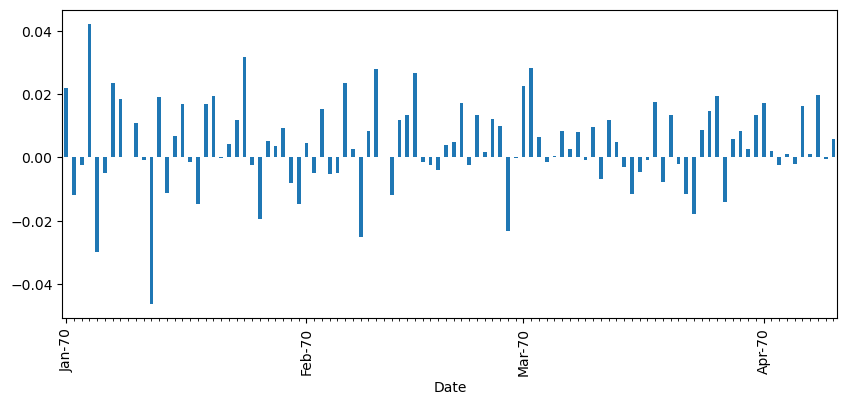

In [48]:
# Bar Plot of Returns
# Sadly dates are broken with Pandas bar plots
# 1970s?
fig, ax = plt.subplots(figsize=(10, 4))
(aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .plot.bar(ax=ax)
)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator())

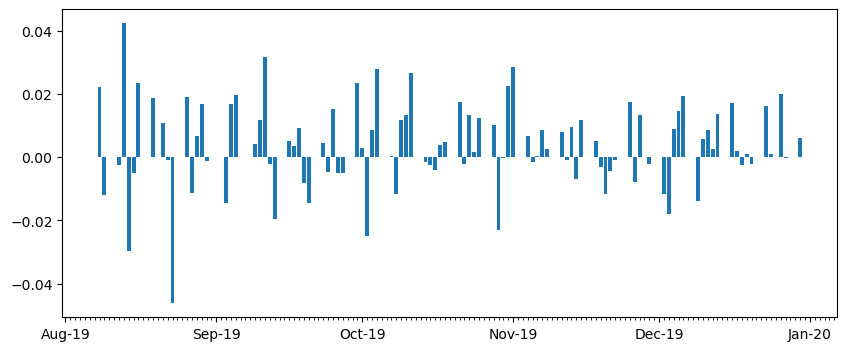

In [52]:
# Returns - using matplotlib
def my_bar(ser, ax):  #passes in Series and Axis
    ax.bar(ser.index, ser) # ax.bar will use matplot lib to plot
    ax.xaxis.set_major_locator(dates.MonthLocator())
    ax.xaxis.set_major_formatter(dates.DateFormatter('%b-%y'))
    ax.xaxis.set_minor_locator(dates.DayLocator())
    return ser

fig, ax = plt.subplots(figsize=(10, 4))    
_ = (aapl
 .pct_change()
 .Close
 .iloc[-100:]
 .pipe(my_bar, ax)
)

# Cumulative Returns
Goal:

* More complicated Pandas
* Refactoring into a function
* Explore source
* Creating new columns with <code>.assign</code>
* Illustrate <code>lambda</code>

*Cumulative Returns* is the amount that investment has gained or lost over time:

(current_price-original_price) / original_price

<Axes: xlabel='Date'>

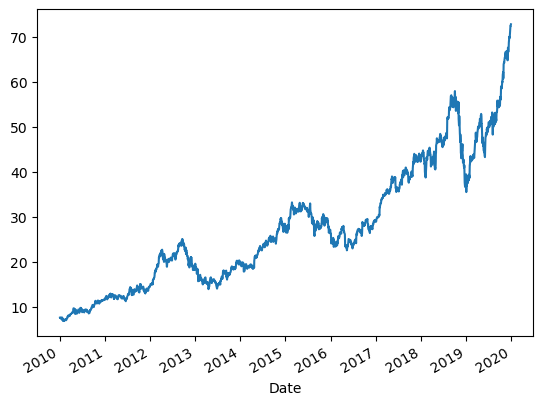

In [53]:
(aapl
 .Close
 .plot()
)